# 犬猫の分類

In [1]:
# 警告メッセージ回避
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ファイルにアクセスするためのモジュールをインポート
from glob import glob

In [3]:
# 犬の画像にアクセスするパスを取得
dog_filepaths = glob('data/dog/*.jpg')
len(dog_filepaths)

250

In [4]:
cat_filepaths = glob('data/cat/*.jpg')

In [5]:
from PIL import Image
#必要なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Pythonの挙動を整えるライブラリのインポート
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0


In [7]:
img_dog = []
for i in range(len(dog_filepaths)):
    img_dog.append(Image.open(dog_filepaths[i]))
    img_dog[i] = np.array(img_dog[i])
img_cat = []
for i in range(len(cat_filepaths)):
    img_cat.append(Image.open(cat_filepaths[i]))
    img_cat[i] = np.array(img_cat[i])

In [8]:
img_dog[0].shape, img_cat[0].shape

((224, 224, 3), (224, 224, 3))

In [9]:
img_dog = np.array(img_dog)
img_cat = np.array(img_cat)

img = np.append(img_dog, img_cat,axis=0)
# img_cat.shape


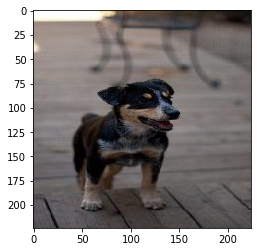

In [10]:
plt.imshow(img_dog[0]) #matplotlibは,BGRで読み込まれる

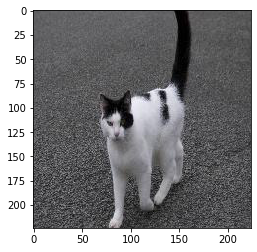

In [11]:
plt.imshow(img_cat[0]) #matplotlibは,BGRで読み込まれる

In [12]:
#　グレースケール変換
import cv2

In [13]:
dog_y, cat_y = [],[]

for i in range(len(img_dog)):
    dog_y.append(0)
for i in range (len(img_cat)):
    cat_y.append(1)
tag = dog_y + cat_y
tag = np.array(tag)
type(tag)
tag.shape

(500,)

In [14]:
type(img)
img.shape

(500, 224, 224, 3)

# 教師データと入力データへの切り分け

In [15]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_t, val_t = train_test_split(img, tag, train_size=0.7, random_state=0)

In [16]:
train_x.shape, val_x.shape

((350, 224, 224, 3), (150, 224, 224, 3))

In [17]:
train_x = train_x/255
val_x = val_x/255

## CNNモデルの定義

In [18]:
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

In [41]:
from tensorflow.keras import models, layers

#シードの固定
reset_seed(0)

#モデルのインスタンス化
model = models.Sequential()

#モデルの構築
model.add(layers.Conv2D(3, (3, 3), activation='relu', input_shape = (224, 224, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(3, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(12, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) #ピクセルのフラット化。畳み込み層から全結合層へつなぐときに必ず入れる。
model.add(layers.Dense(7, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(5, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2, activation='softmax'))

#optimizerの設定
optimizer = keras.optimizers.Adam(lr = 0.007)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Train on 350 samples, validate on 150 samples
Epoch 1/50
350/350 [==============================] - 2s 7ms/sample - loss: 1.0623 - accuracy: 0.5314 - val_loss: 0.7392 - val_accuracy: 0.4933
Epoch 2/50
350/350 [==============================] - 1s 2ms/sample - loss: 0.6782 - accuracy: 0.6143 - val_loss: 0.6904 - val_accuracy: 0.5267
Epoch 3/50
350/350 [==============================] - 1s 2ms/sample - loss: 0.6630 - accuracy: 0.5686 - val_loss: 0.6943 - val_accuracy: 0.5800
Epoch 4/50
350/350 [==============================] - 1s 2ms/sample - loss: 0.6303 - accuracy: 0.6257 - val_loss: 0.7487 - val_accuracy: 0.5400
Epoch 5/50
350/350 [==============================] - 1s 2ms/sample - loss: 0.6204 - accuracy: 0.6629 - val_loss: 0.7217 - val_accuracy: 0.5267
Epoch 6/50
350/350 [==============================] - 1s 2ms/sample - loss: 0.6051 - accuracy: 0.6686 - val_loss: 0.7165 - val_accuracy: 0.5267
Epoch 7/50
350/350 [==============================] - 1s 2ms/sample - loss: 0.6059 - accur

,loss,accuracy,val_loss,val_accuracy
0,1.062313,0.531429,0.739216,0.493333
1,0.678156,0.614286,0.690368,0.526667
2,0.662994,0.568571,0.694344,0.580000
3,0.630319,0.625714,0.748730,0.540000
4,0.620429,0.662857,0.721721,0.526667
5,0.605133,0.668571,0.716544,0.526667
6,0.605923,0.662857,0.694448,0.526667
7,0.584843,0.705714,0.702595,0.526667
8,0.495870,0.745714,0.720696,0.526667
9,0.470476,0.797143,0.821097,0.506667


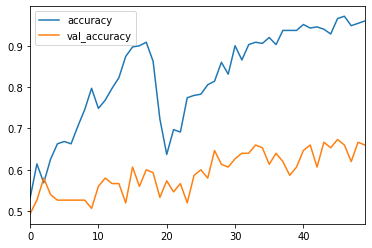

In [42]:
history = model.fit(train_x, train_t,
          batch_size=10,
          epochs=50,
          verbose=1,
          validation_data=(val_x, val_t))
results = pd.DataFrame(history.history)
graph = results[['accuracy', 'val_accuracy']].plot()
results